<a href="https://colab.research.google.com/github/riyasingh-10/google-colab/blob/main/diabetes_data_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

diabetes prediction of a patient .


In [5]:
# Load the Pima Indians Diabetes dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=column_names)

# Display first few rows
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose       

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=column_names)


print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Dataset shape
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("\n" + "="*50 + "\n")

# Column information
print("Column Data Types:")
print(df.dtypes)
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Basic statistics
print("Statistical Summary:")
df.describe()



## Initial Observations


Dataset has 768 rows and 9 columns


Column Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Diabetes Outcome Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


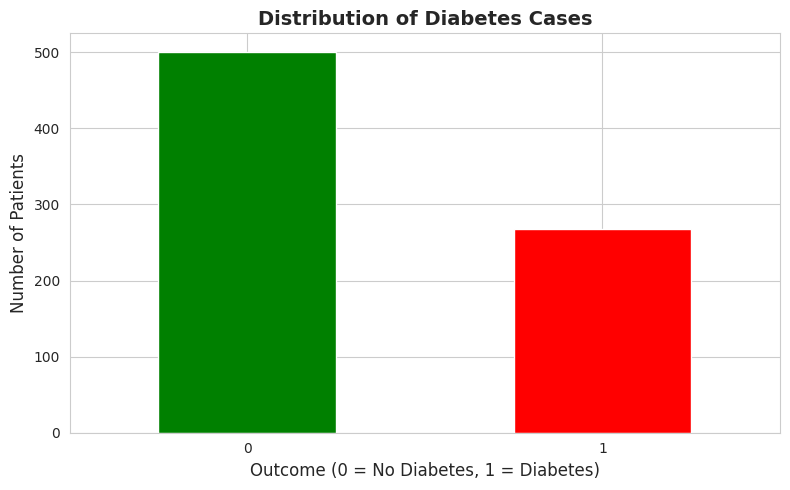

In [8]:
# Check the distribution of diabetes cases
print("Diabetes Outcome Distribution:")
print(df['Outcome'].value_counts())
print("\nPercentage:")
print(df['Outcome'].value_counts(normalize=True) * 100)

# Visualize the distribution
plt.figure(figsize=(8, 5))
df['Outcome'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Diabetes Cases', fontsize=14, fontweight='bold')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#Approximately 65% of patients do not have diabetes, while 35% have been diagnosed with diabetes. This shows the dataset is somewhat imbalanced but still workable for analysis.

In [9]:
# Check for zero values in columns where zero doesn't make sense
print("Zero values in each column:")
print((df == 0).sum())
print("\n")

# Columns where 0 doesn't make biological sense
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Checking columns where 0 is unrealistic:")
for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    print(f"{col}: {zero_count} zeros ({zero_percentage:.2f}%)")

Zero values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Checking columns where 0 is unrealistic:
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)


In [10]:
# Replace zeros with NaN in columns where 0 is unrealistic
df_cleaned = df.copy()

for col in zero_cols:
    df_cleaned[col] = df_cleaned[col].replace(0, np.nan)

# Check missing values after replacement
print("Missing values after replacing zeros:")
print(df_cleaned.isnull().sum())
print("\n")

# Fill missing values with median (more robust than mean)
for col in zero_cols:
    median_value = df_cleaned[col].median()
    df_cleaned[col].fillna(median_value, inplace=True)
    print(f"Filled {col} with median: {median_value:.2f}")

# Verify no missing values remain
print("\nFinal check - Missing values:")
print(df_cleaned.isnull().sum())


#Several columns contained zero values where zero is biologically impossible (e.g., Glucose, BMI, BloodPressure). These zeros likely represent missing data. I replaced them with the median value of each column, which is more robust to outliers than the mean.

Missing values after replacing zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Filled Glucose with median: 117.00
Filled BloodPressure with median: 72.00
Filled SkinThickness with median: 29.00
Filled Insulin with median: 125.00
Filled BMI with median: 32.30

Final check - Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-217539107.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_value, inplace=True)


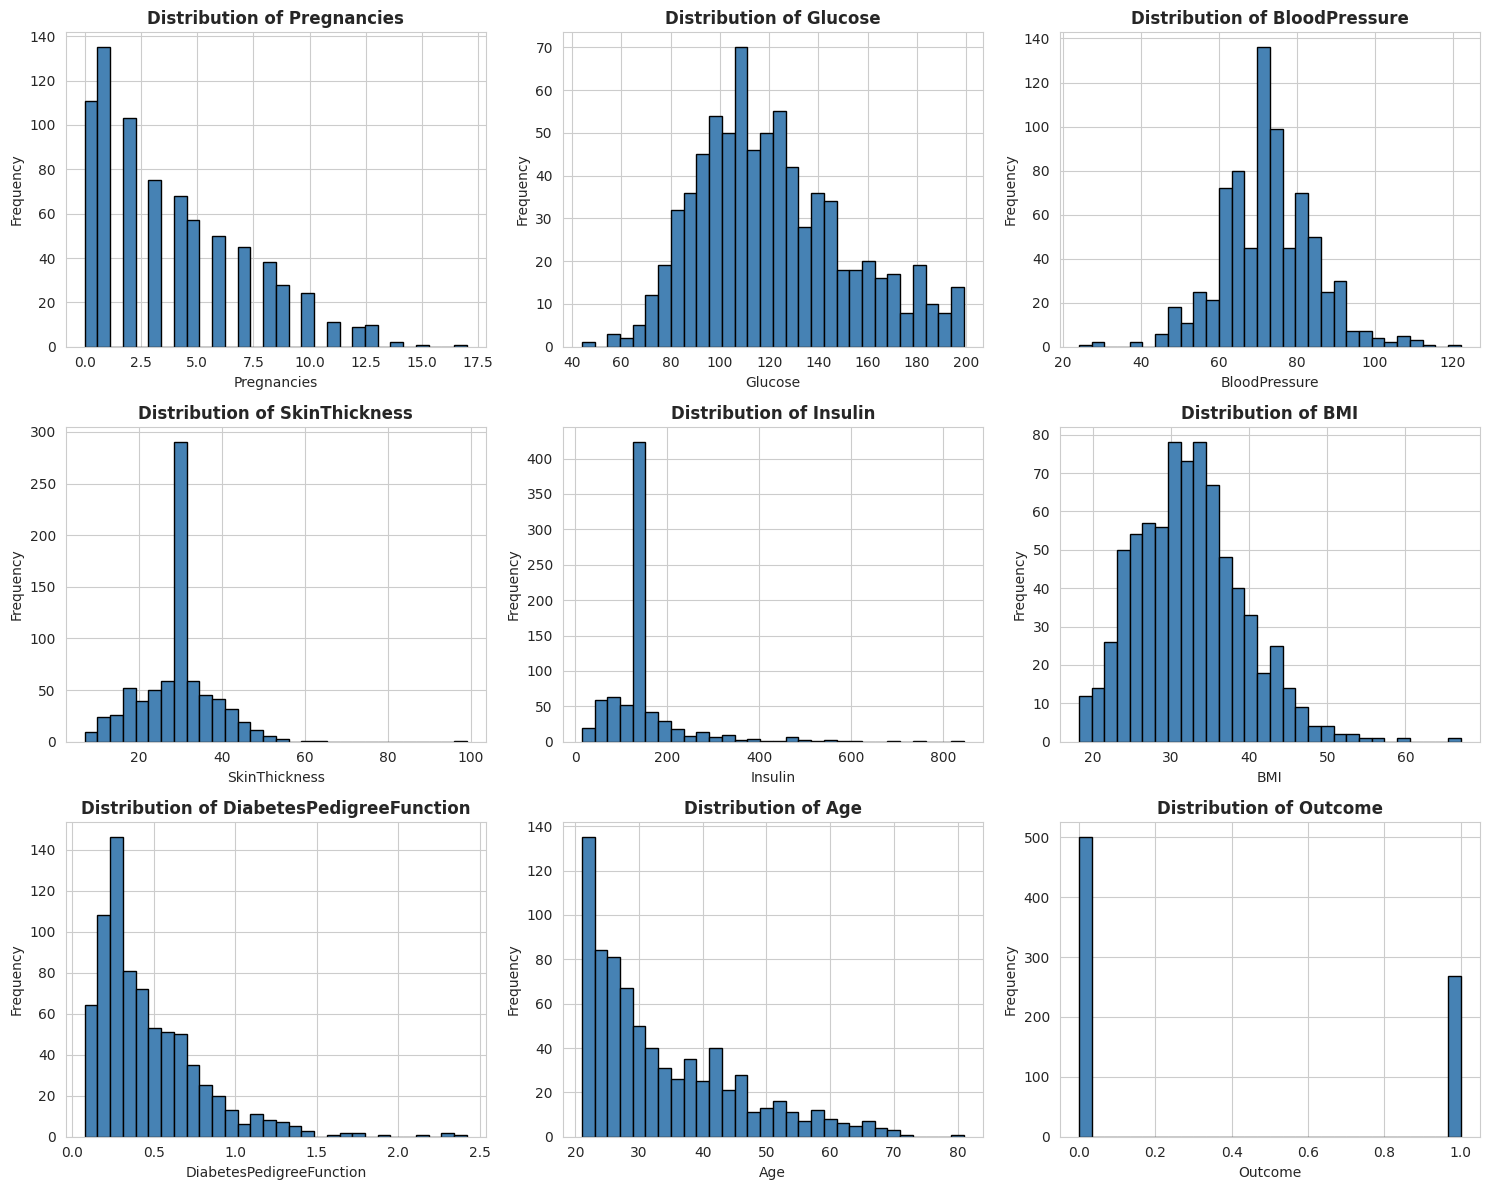

In [11]:
# Visualize distributions of all features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(df_cleaned.columns):
    axes[idx].hist(df_cleaned[col], bins=30, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

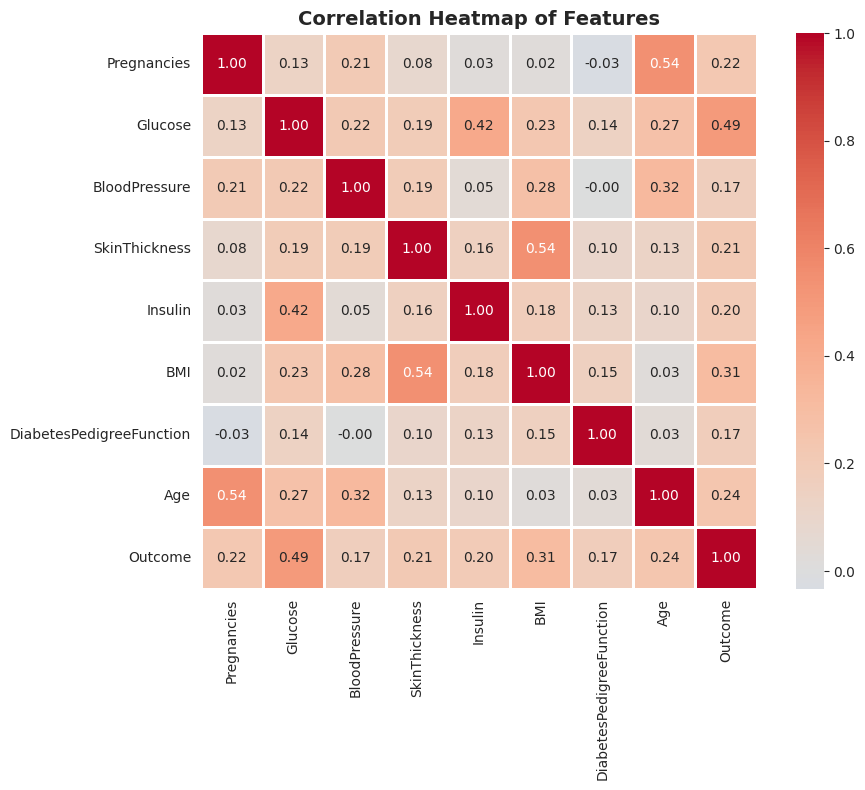

Correlation with Diabetes Outcome:
Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


In [12]:
# Calculate correlation matrix
correlation = df_cleaned.corr()

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Heatmap of Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Show correlation with Outcome specifically
print("Correlation with Diabetes Outcome:")
print(correlation['Outcome'].sort_values(ascending=False))

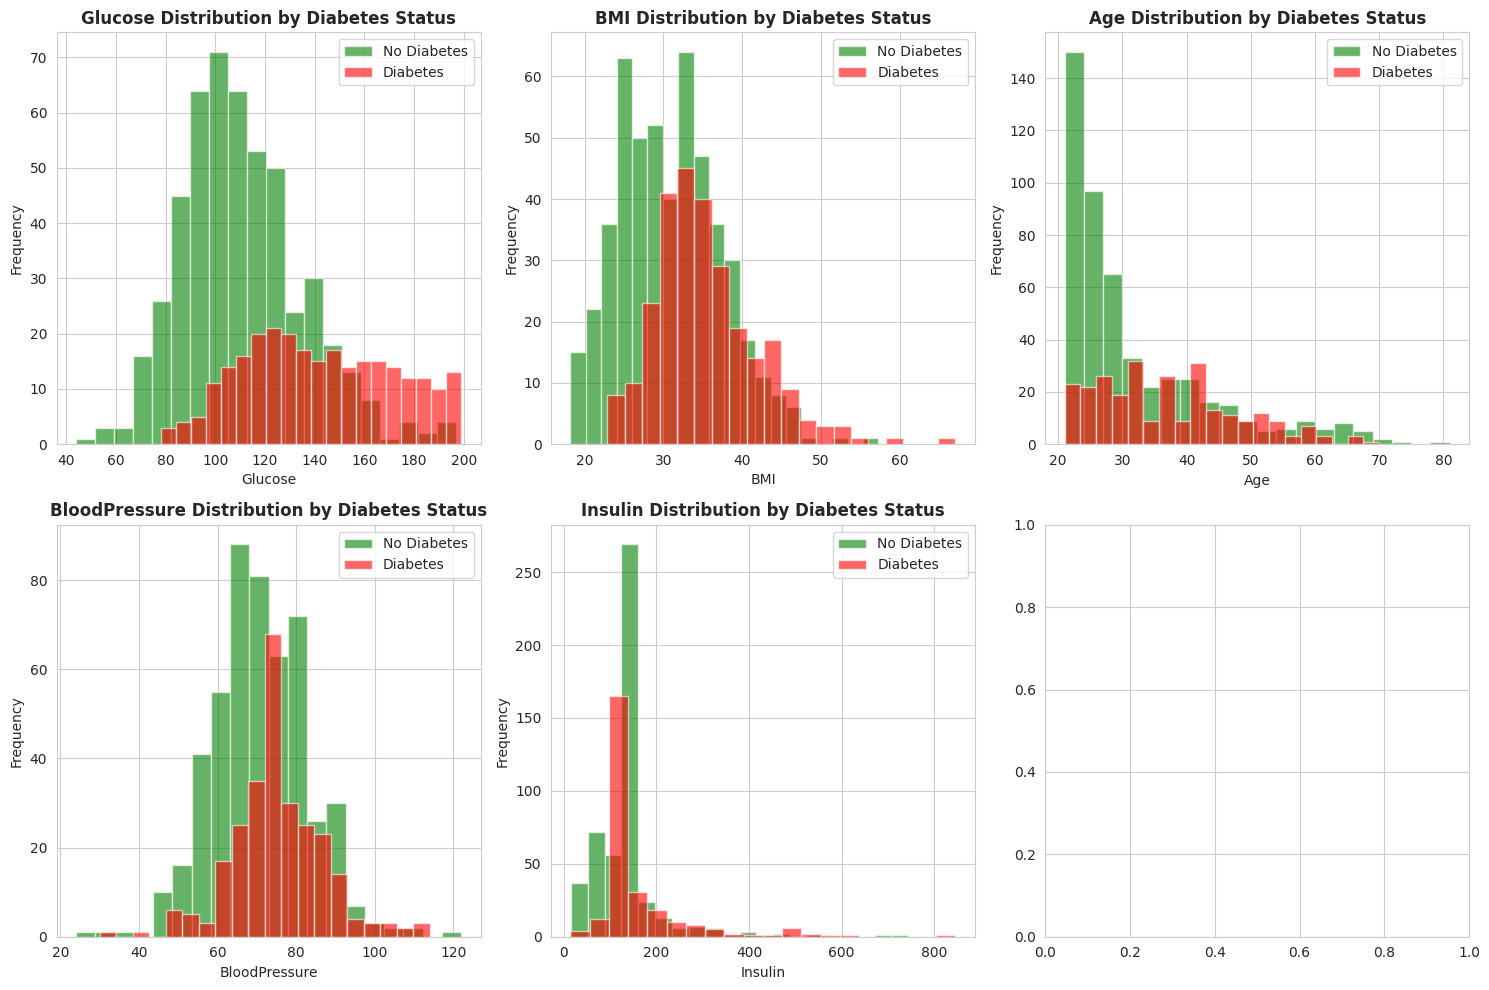

In [13]:
# Separate diabetic and non-diabetic patients
diabetic = df_cleaned[df_cleaned['Outcome'] == 1]
non_diabetic = df_cleaned[df_cleaned['Outcome'] == 0]

# Compare key metrics
comparison_features = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(comparison_features):
    axes[idx].hist(non_diabetic[feature], bins=20, alpha=0.6, label='No Diabetes', color='green')
    axes[idx].hist(diabetic[feature], bins=20, alpha=0.6, label='Diabetes', color='red')
    axes[idx].set_title(f'{feature} Distribution by Diabetes Status', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

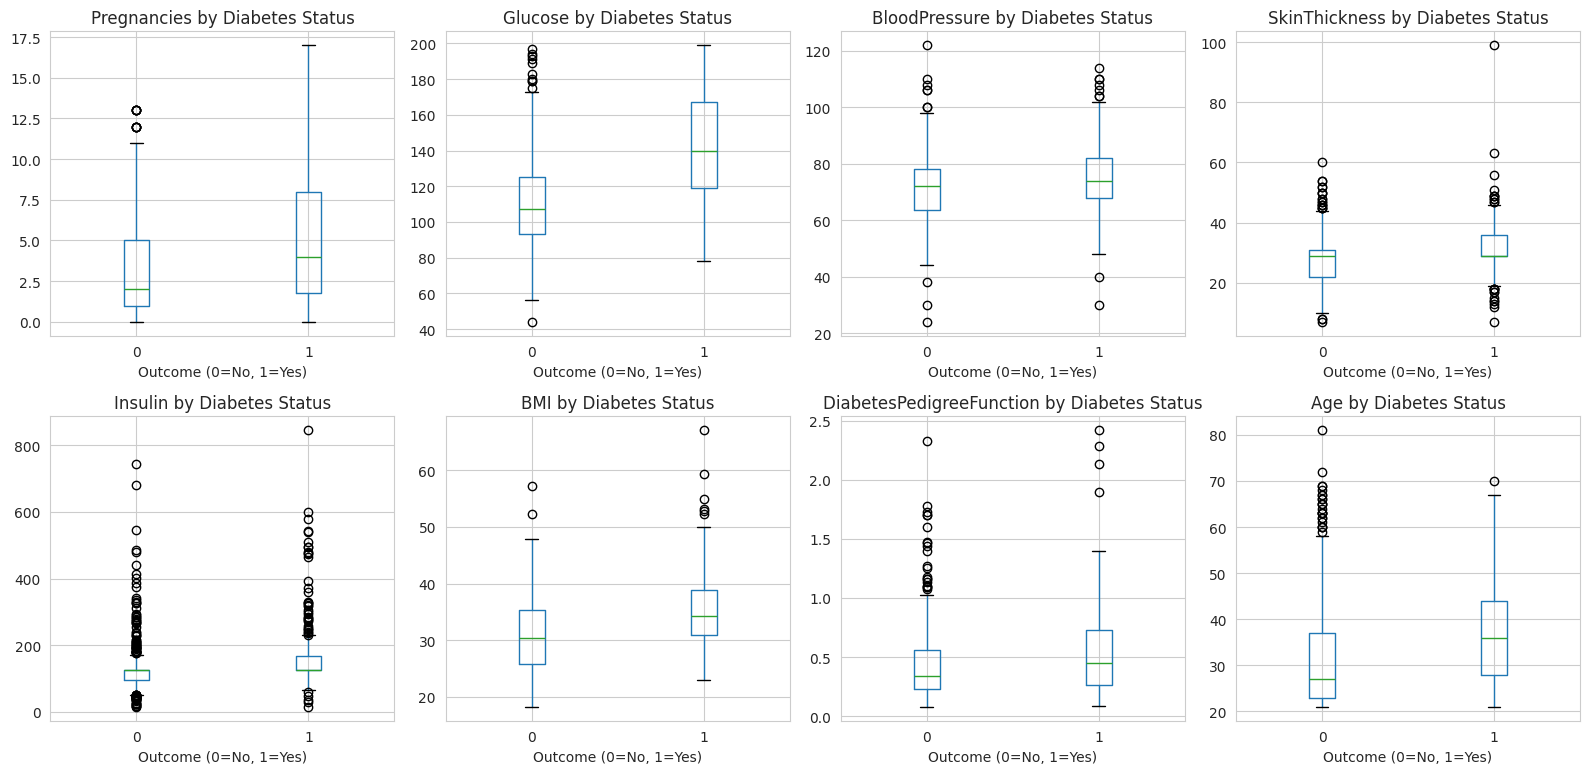

In [14]:
# Box plots to see outliers and compare groups
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

features = df_cleaned.columns[:-1]  # All except Outcome

for idx, feature in enumerate(features):
    df_cleaned.boxplot(column=feature, by='Outcome', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Diabetes Status')
    axes[idx].set_xlabel('Outcome (0=No, 1=Yes)')

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

/tmp/ipython-input-843023685.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_diabetes = df_cleaned.groupby('AgeGroup')['Outcome'].agg(['sum', 'count'])


Diabetes Rate by Age Group:
          sum  count  diabetes_rate
AgeGroup                           
20-30      90    417      21.582734
30-40      76    157      48.407643
40-50      64    113      56.637168
50-60      31     54      57.407407
60+         7     27      25.925926


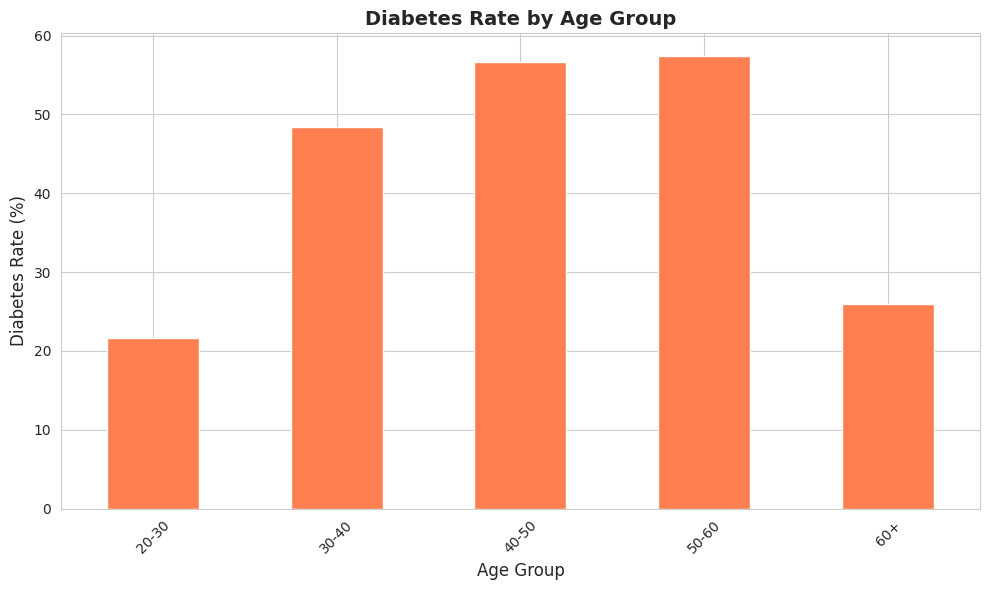

In [15]:
# Create age groups
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'],
                                 bins=[20, 30, 40, 50, 60, 100],
                                 labels=['20-30', '30-40', '40-50', '50-60', '60+'])

# Diabetes rate by age group
age_diabetes = df_cleaned.groupby('AgeGroup')['Outcome'].agg(['sum', 'count'])
age_diabetes['diabetes_rate'] = (age_diabetes['sum'] / age_diabetes['count']) * 100

print("Diabetes Rate by Age Group:")
print(age_diabetes)

# Visualize
plt.figure(figsize=(10, 6))
age_diabetes['diabetes_rate'].plot(kind='bar', color='coral')
plt.title('Diabetes Rate by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Diabetes Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3718346932.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([non_diabetic['Glucose'], diabetic['Glucose']],


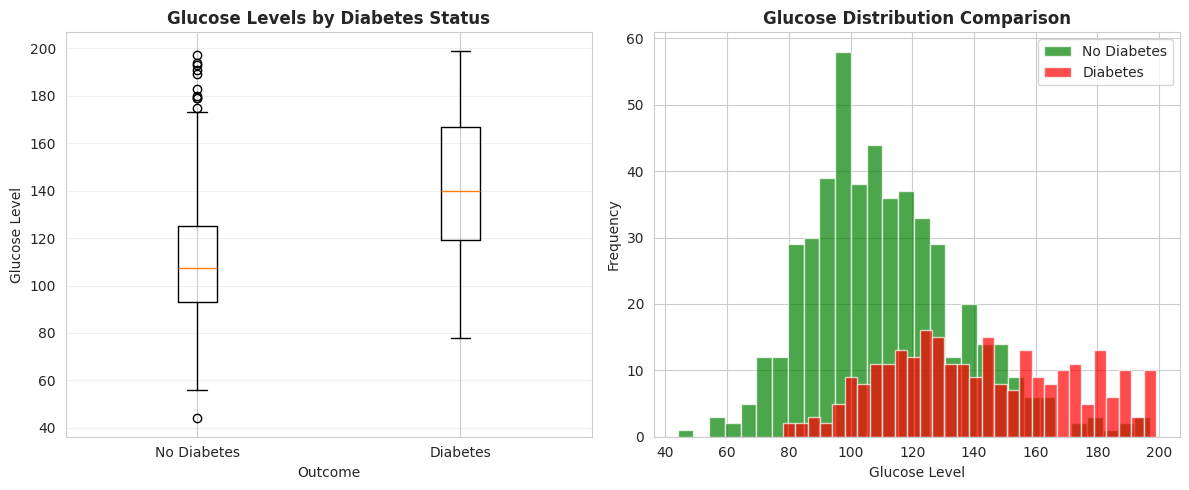

Average Glucose - Non-Diabetic: 110.68
Average Glucose - Diabetic: 142.13
Difference: 31.45


In [18]:
# Analyze glucose levels - the strongest predictor
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot - LEFT SIDE
axes[0].boxplot([non_diabetic['Glucose'], diabetic['Glucose']],
                labels=['No Diabetes', 'Diabetes'])
axes[0].set_title('Glucose Levels by Diabetes Status', fontweight='bold')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Glucose Level')
axes[0].grid(axis='y', alpha=0.3)

# Histogram - RIGHT SIDE
axes[1].hist(non_diabetic['Glucose'], bins=30, alpha=0.7, label='No Diabetes', color='green')
axes[1].hist(diabetic['Glucose'], bins=30, alpha=0.7, label='Diabetes', color='red')
axes[1].set_title('Glucose Distribution Comparison', fontweight='bold')
axes[1].set_xlabel('Glucose Level')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

# Statistical comparison
print(f"Average Glucose - Non-Diabetic: {non_diabetic['Glucose'].mean():.2f}")
print(f"Average Glucose - Diabetic: {diabetic['Glucose'].mean():.2f}")
print(f"Difference: {diabetic['Glucose'].mean() - non_diabetic['Glucose'].mean():.2f}")


## Key Findings

1. **Strongest Predictors**:

2. **Glucose Levels**: Diabetic patients have significantly higher average glucose levels

3. **Age Factor**: Diabetes prevalence increases with age, particularly after 40s

4. **BMI Impact**: the diabetic people have much higher bmi then non diabetic people mainky around 30-40 with some expections reaching 60 .

## Recommendations for Prevention

- Regular glucose monitoring for at-risk individuals
- Weight management (BMI control)
- Increased screening for patients over 40+ years

## Limitations

- Dataset limited to female Pima Indian population
- Some missing data required imputation
- Needs validation with larger, more diverse populations